# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands


**So interpretation is important!**

The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE


import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',30)

In [2]:
# Reading the dataset

df_day = pd.read_csv("day.csv")
df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
# Let's look at the number of rows and columns in the dataset

df_day.shape

(730, 16)

In [4]:
# Understanding the feature names in the dataset

df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Getting insights of the features

df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Summary of the dataset: 730 rows, 16 columns, no null values

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [7]:
# firstly dropping 'instant' variable as it is nothing but index.

df_day.drop('instant',axis=1,inplace=True)

In [8]:
# changing dteday variable to datetime 

df_day.dteday = pd.to_datetime(df_day.dteday,format='%d-%m-%Y')

In [9]:
# Assigning string values to different seasons instead of numeric values. These numeric values may 
# misindicate some order to it.

df_day['season'] = df_day['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [10]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season

df_day['season'] = df_day['season'].astype('category')
df_day['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# year (0: 2018, 1:2019)
df_day['yr'] = df_day['yr'].astype('category')

df_day['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [12]:
df_day['mnth'] = df_day.dteday.dt.month_name()

In [13]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month

df_day['mnth'] = df_day['mnth'].astype('category')
df_day['mnth'].value_counts()

August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
February     56
Name: mnth, dtype: int64

In [14]:
# whether day is a holiday or not (0: No, 1: Yes)

df_day['holiday'] = df_day['holiday'].astype('category')
df_day['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.

df_day['weekday'] = df_day.dteday.dt.day_name()

In [16]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays

df_day['weekday'] = df_day['weekday'].astype('category')
df_day['weekday'].value_counts()

Monday       105
Tuesday      105
Friday       104
Saturday     104
Sunday       104
Thursday     104
Wednesday    104
Name: weekday, dtype: int64

In [17]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0

df_day['workingday'] = df_day['workingday'].astype('category')
df_day['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [18]:
# Replacing long weathersit names into string values for better readability and understanding

df_day['weathersit'] = df_day.weathersit.map({1:'A',2:'B',3:'C',4:'D'})

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [19]:
# Taking count based on weather situations

df_day['weathersit'] = df_day['weathersit'].astype('category')
df_day['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [20]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    category      
 2   yr          730 non-null    category      
 3   mnth        730 non-null    category      
 4   holiday     730 non-null    category      
 5   weekday     730 non-null    category      
 6   workingday  730 non-null    category      
 7   weathersit  730 non-null    category      
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

In [21]:
categorical_cols = df_day.select_dtypes('category').columns
numerical_cols = df_day.select_dtypes(exclude=['category','datetime64']).columns

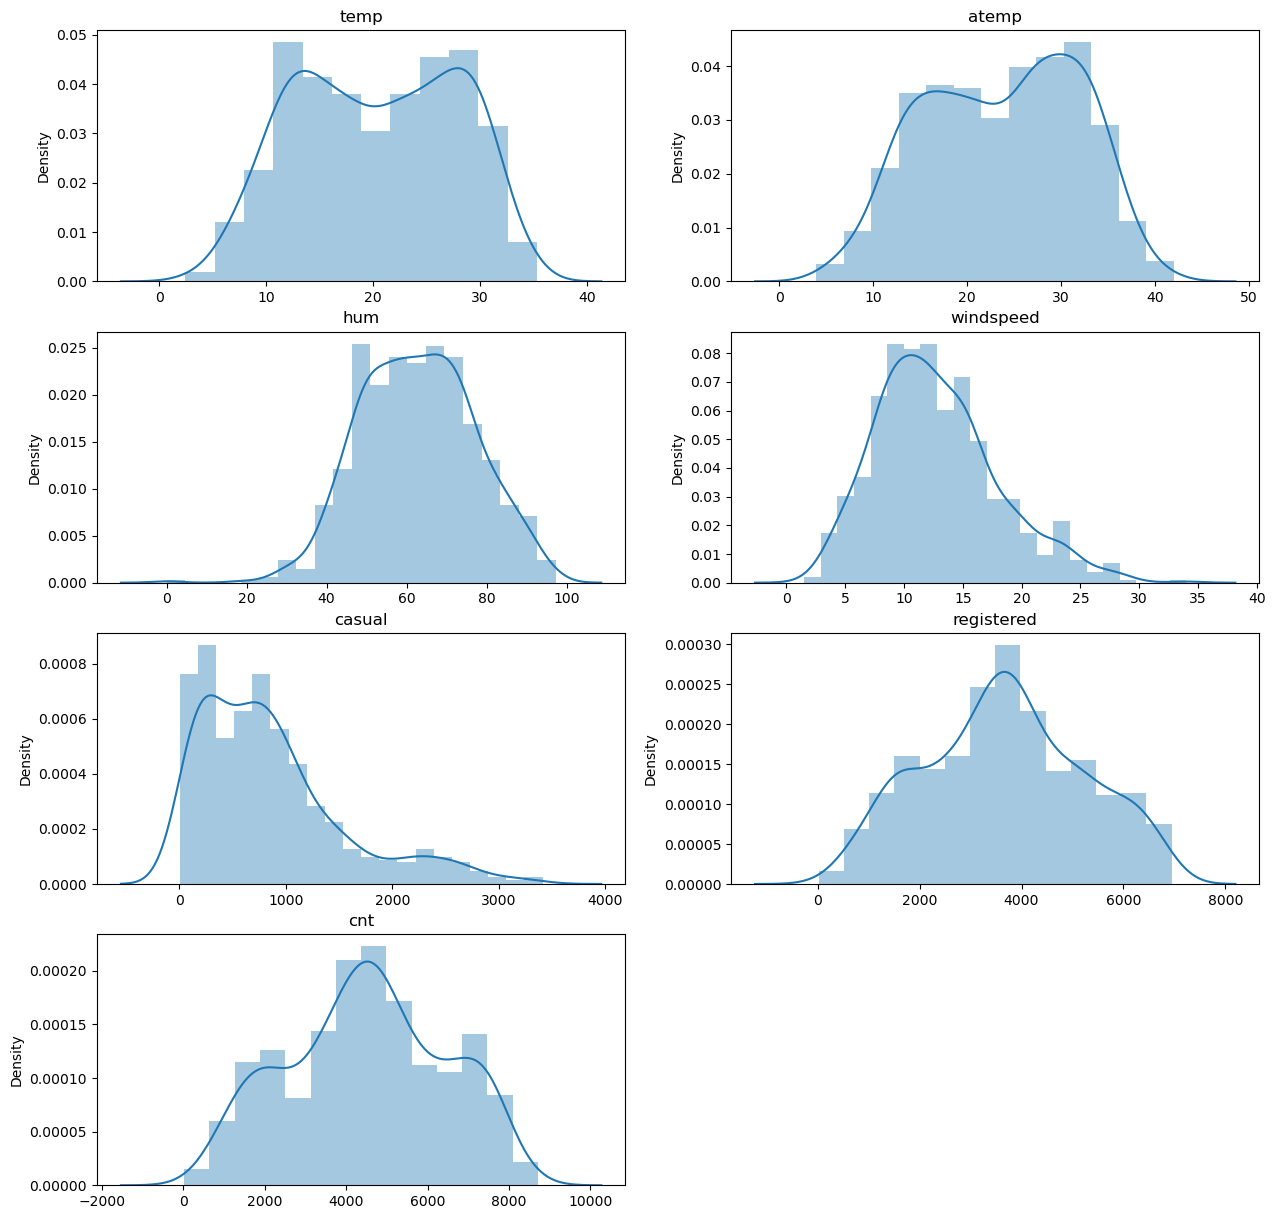

In [22]:
# Distribution of numerical variables

plt.figure(figsize=(15,15))

for i,j in enumerate(numerical_cols,1):
    plt.subplot(4,2,i)
    sns.distplot(df_day[j])
    plt.title(j)
    plt.xlabel(None)
plt.show()

- 'temp'-'atemp'
- 'registered'-'cnt'

Above variables are showing almost similar distribution which is a strong indicator of multi-collinearity, we will deal with these variables before model building

In [23]:
# Lets take a look at only categorical variables

In [24]:
df_day[categorical_cols].head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,January,0,Monday,1,B
1,spring,0,January,0,Tuesday,1,B
2,spring,0,January,0,Wednesday,1,A
3,spring,0,January,0,Thursday,1,A
4,spring,0,January,0,Friday,1,A


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

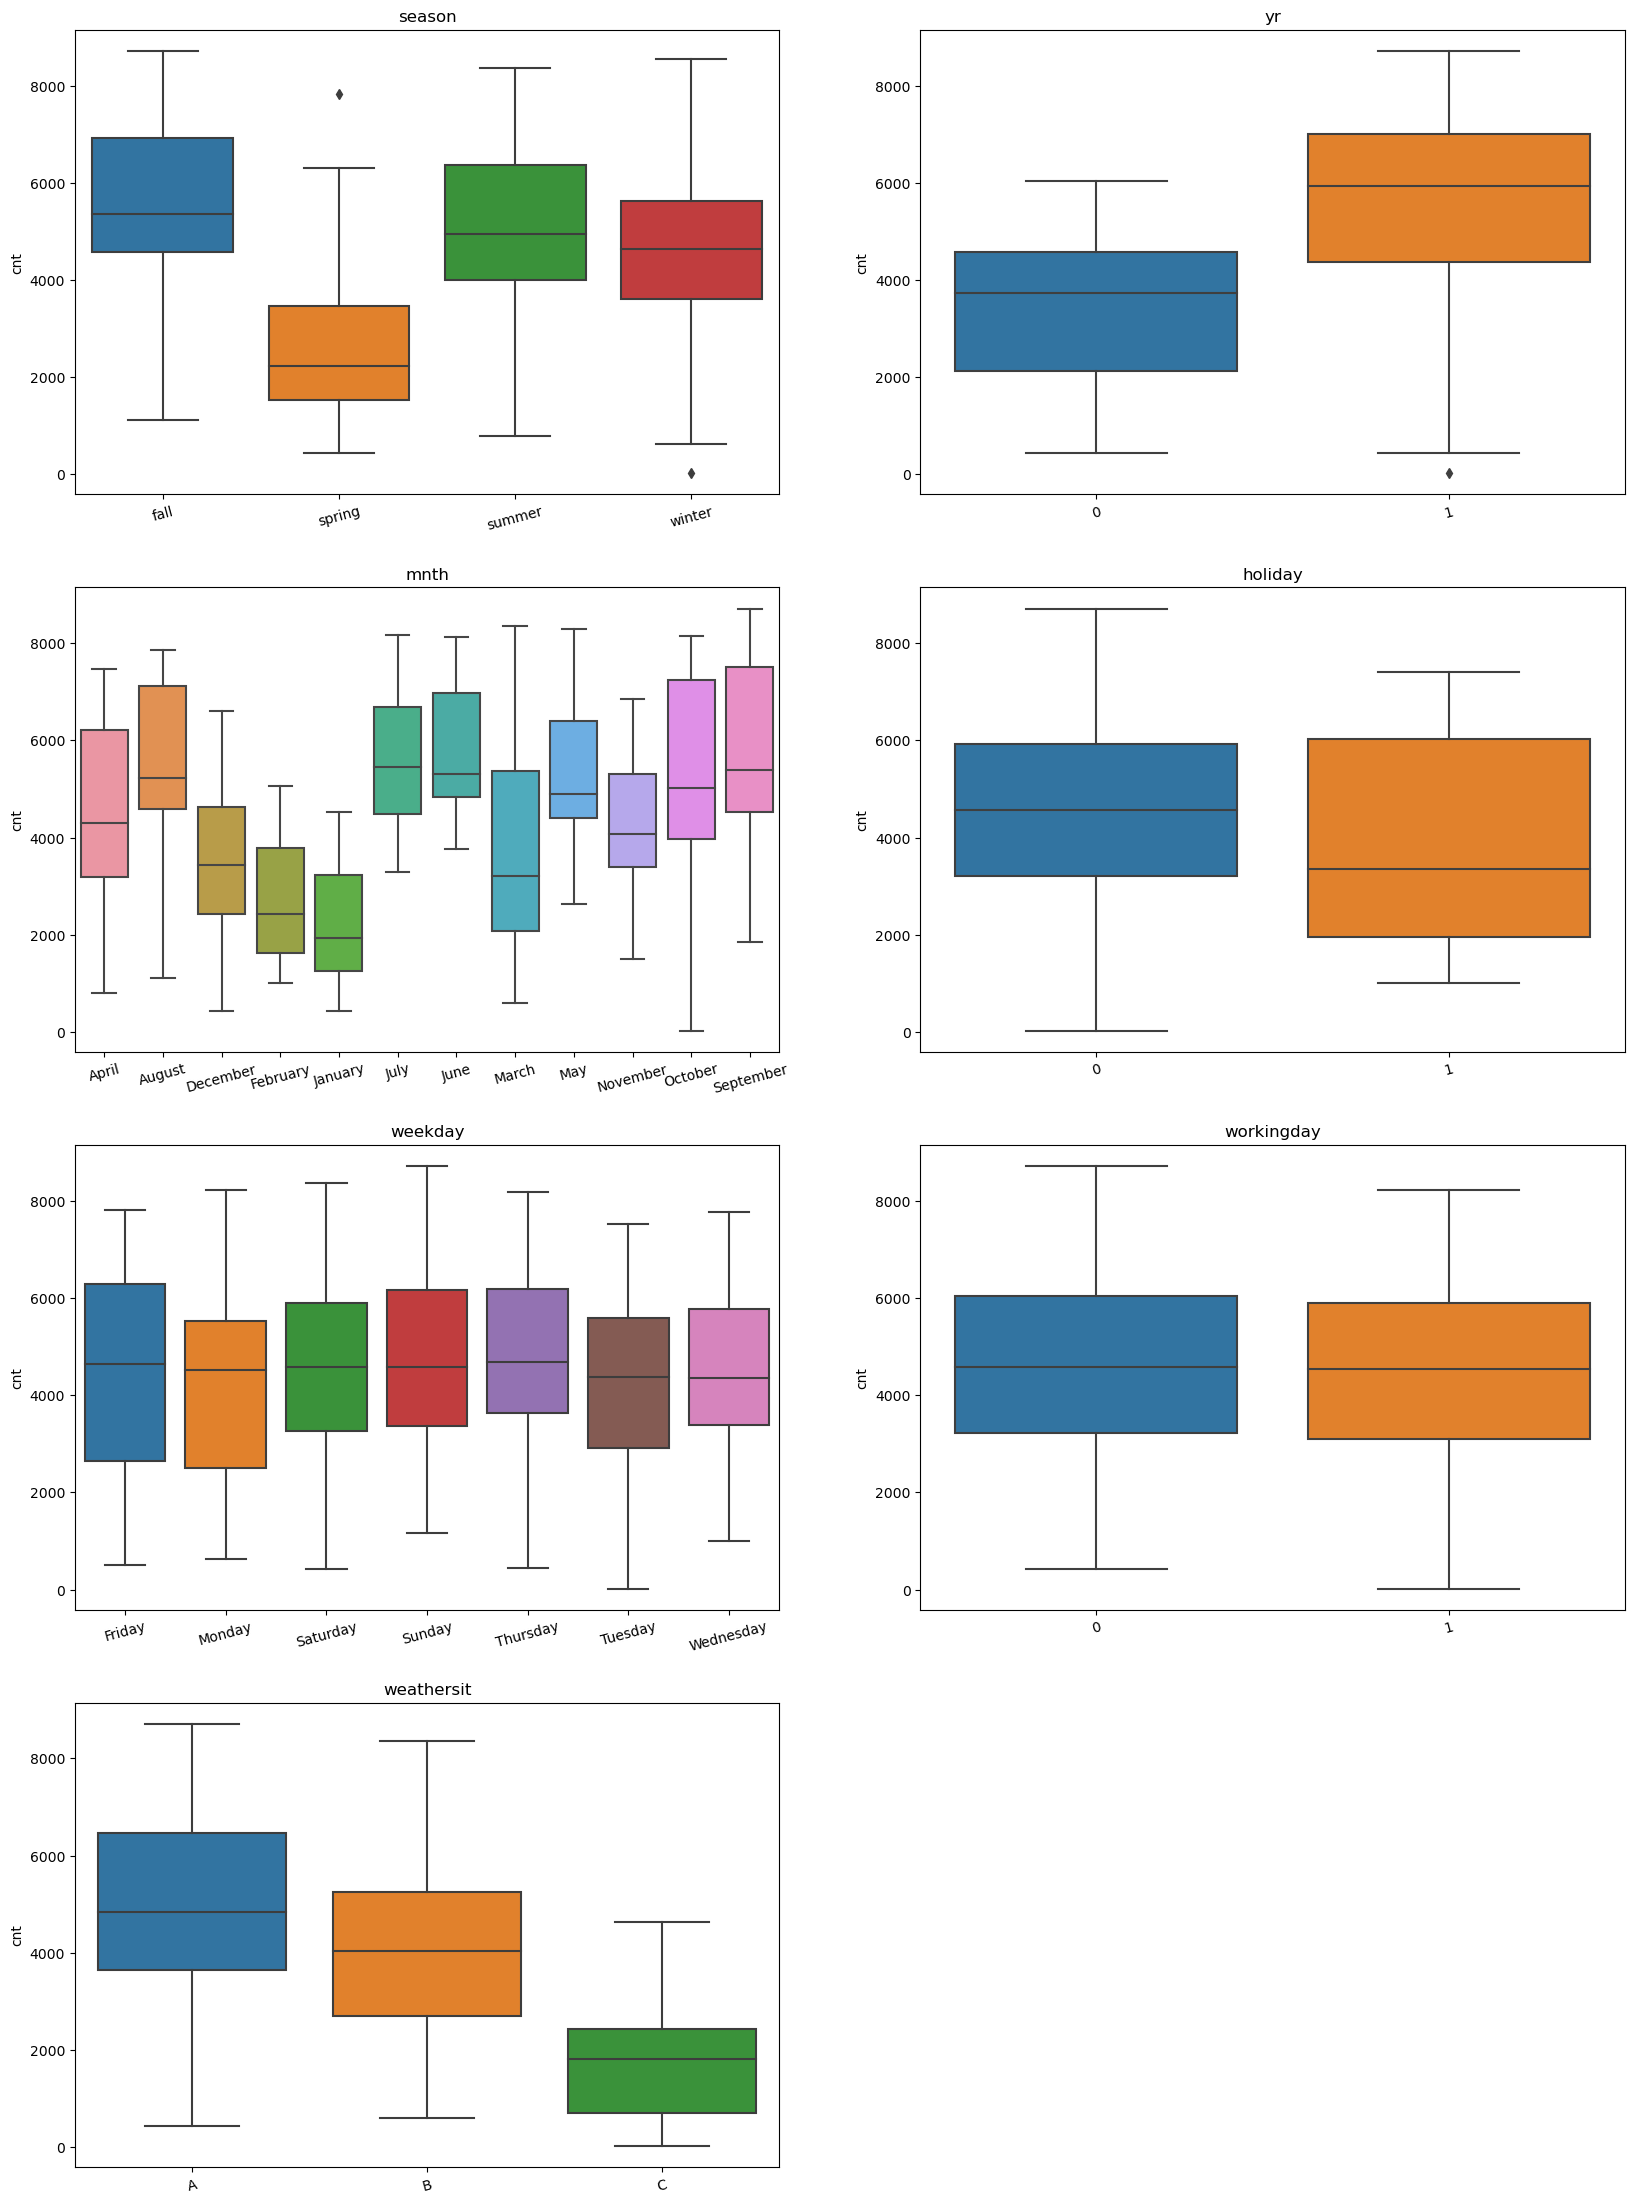

In [25]:
# Categorywise demand

plt.figure(figsize=(20, 35))

for i,j in enumerate(categorical_cols,1):
    plt.subplot(5,2,i)
    sns.boxplot(data=df_day,x=j,y='cnt')
    plt.title(j)
    plt.xlabel(None)
    plt.xticks(rotation=15)
plt.show()

- For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring .
- The count of users is less during the holidays
- From the "Workingday" boxplot we can see that maximum bookings happening between 4000 and 6000. There is not much of difference in booking whether its working day or not.
- The count of total users is in between 4000 to 6000 (~5500) during  weather sitiation A(Clear)
- From the "Mnth" boxplot we can see that the months are following a trend and could be a good predictor variable. The bookings in the mid-month are above 4000. The count is highest in the month of Sept
- The bike demand is almost constant throughout the week. there seems no trend in the weekday dataset.
- The year 2019 had a higher count of users as compared to the year 2018.
- Also, its important to note that, almost all the categories do not have any significant outliers.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [26]:
df_day[numerical_cols].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


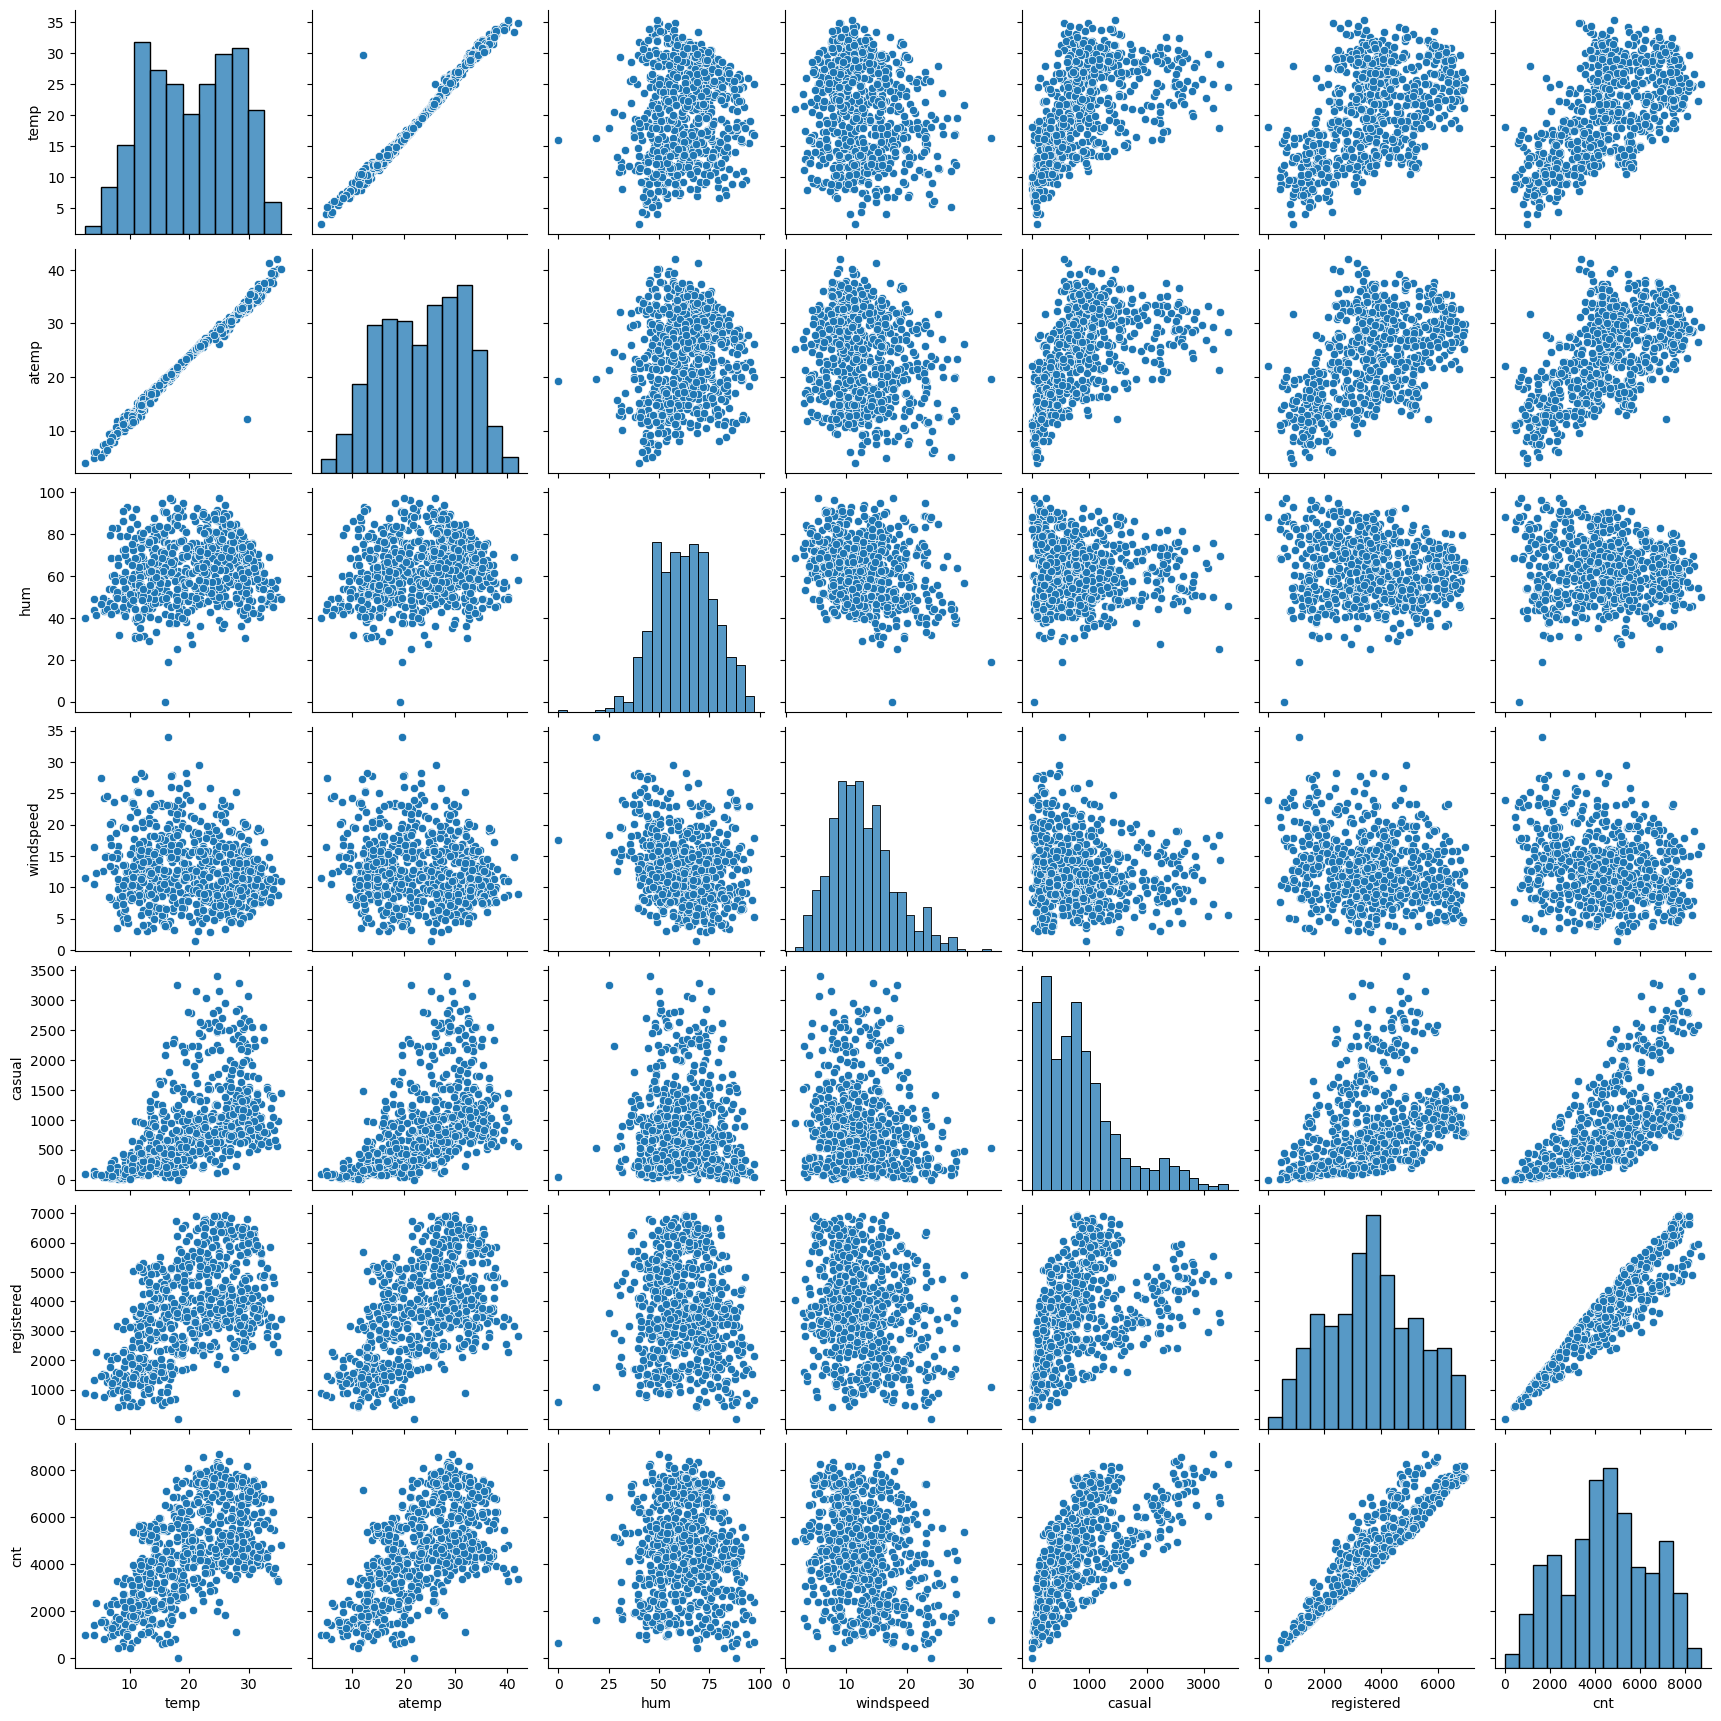

In [27]:
# Pairwise scatter plot

sns.pairplot(df_day[numerical_cols])
plt.show()

- registered and casual variables have strong positive correlation with cnt variable.
- temp and a temp are also highly correlated.
- Also temp and atemp seems to have positive correlation with cnt variable.

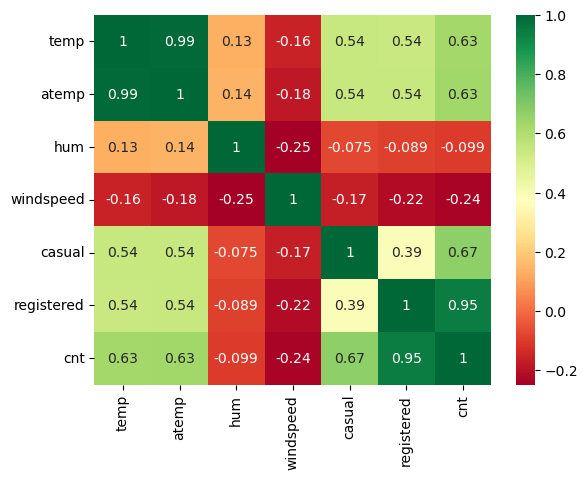

In [28]:
# let's plot heatmap and check the actual strength of correlation

sns.heatmap(df_day[numerical_cols].corr(),cmap='RdYlGn',annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is with 'atemp'.
- We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.
- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.

### Thus, before building the model, we'll have to pay attention to multicollinearity.

In [29]:
# removing atemp as it is highly correlated with temp

# removing resitered and casual as both the variables sumed up together would result in cnt variable 
# and cause multi-collinearity

# also, as we have day,month,year as seperate variables, wo don't need dteday variable. and anyway it's not going 
# to be useful in model building too


df_day.drop(['atemp','registered','casual','dteday'],axis=1,inplace=True)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [30]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,B,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,B,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,A,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,A,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,A,9.305237,43.6957,12.522300,1600


In [31]:
# as yr, holiday, workingday are already in One-Hot Encoded format, (0's and 1's), we will only create 
# dummy variables for remaining categorical variables.

#### Dummy Variables

Let's create dummy variables for remaining categorical columns. i.e. 'season','mnth', 'weekday','weathersit'

In [32]:
# using pandas get_dummies function
# keeping drop_first as True to avoid dummy variable trap

dummy_df = pd.get_dummies(df_day[['season','mnth', 'weekday','weathersit']],drop_first=True)
dummy_df.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# dropping the categorical variable for which we have created dummy variables

df_day.drop(['season','mnth', 'weekday','weathersit'],axis=1,inplace=True)

In [34]:
# Concatenating dummy variable's df with the original dataframe

df_day = pd.concat([df_day, dummy_df], axis=1)

In [35]:
# Let's check the first few rows
df_day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [36]:
# Split the dataframe into train and test sets

np.random.seed(0)
df_train, df_test = train_test_split(df_day, train_size=0.7, random_state=100)

In [37]:
df_train.shape, df_test.shape

((510, 29), (220, 29))

### Scaling

- Now that we have done the test-train split, we need to scale the variables for better interpretability and faster convergence of gradient-descent algorithm. 
- But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning.

In [38]:
# let's redefine the numerical columns on which we want to apply scaling

numerical_cols = ['temp', 'hum', 'windspeed','cnt']

In [39]:
scalar = MinMaxScaler()

df_train[numerical_cols] = scalar.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scalar.transform(df_test[numerical_cols])

In [40]:
# let's check if scaling has been performed correctly

df_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412
std,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As expected, the variables have been appropriately scaled.

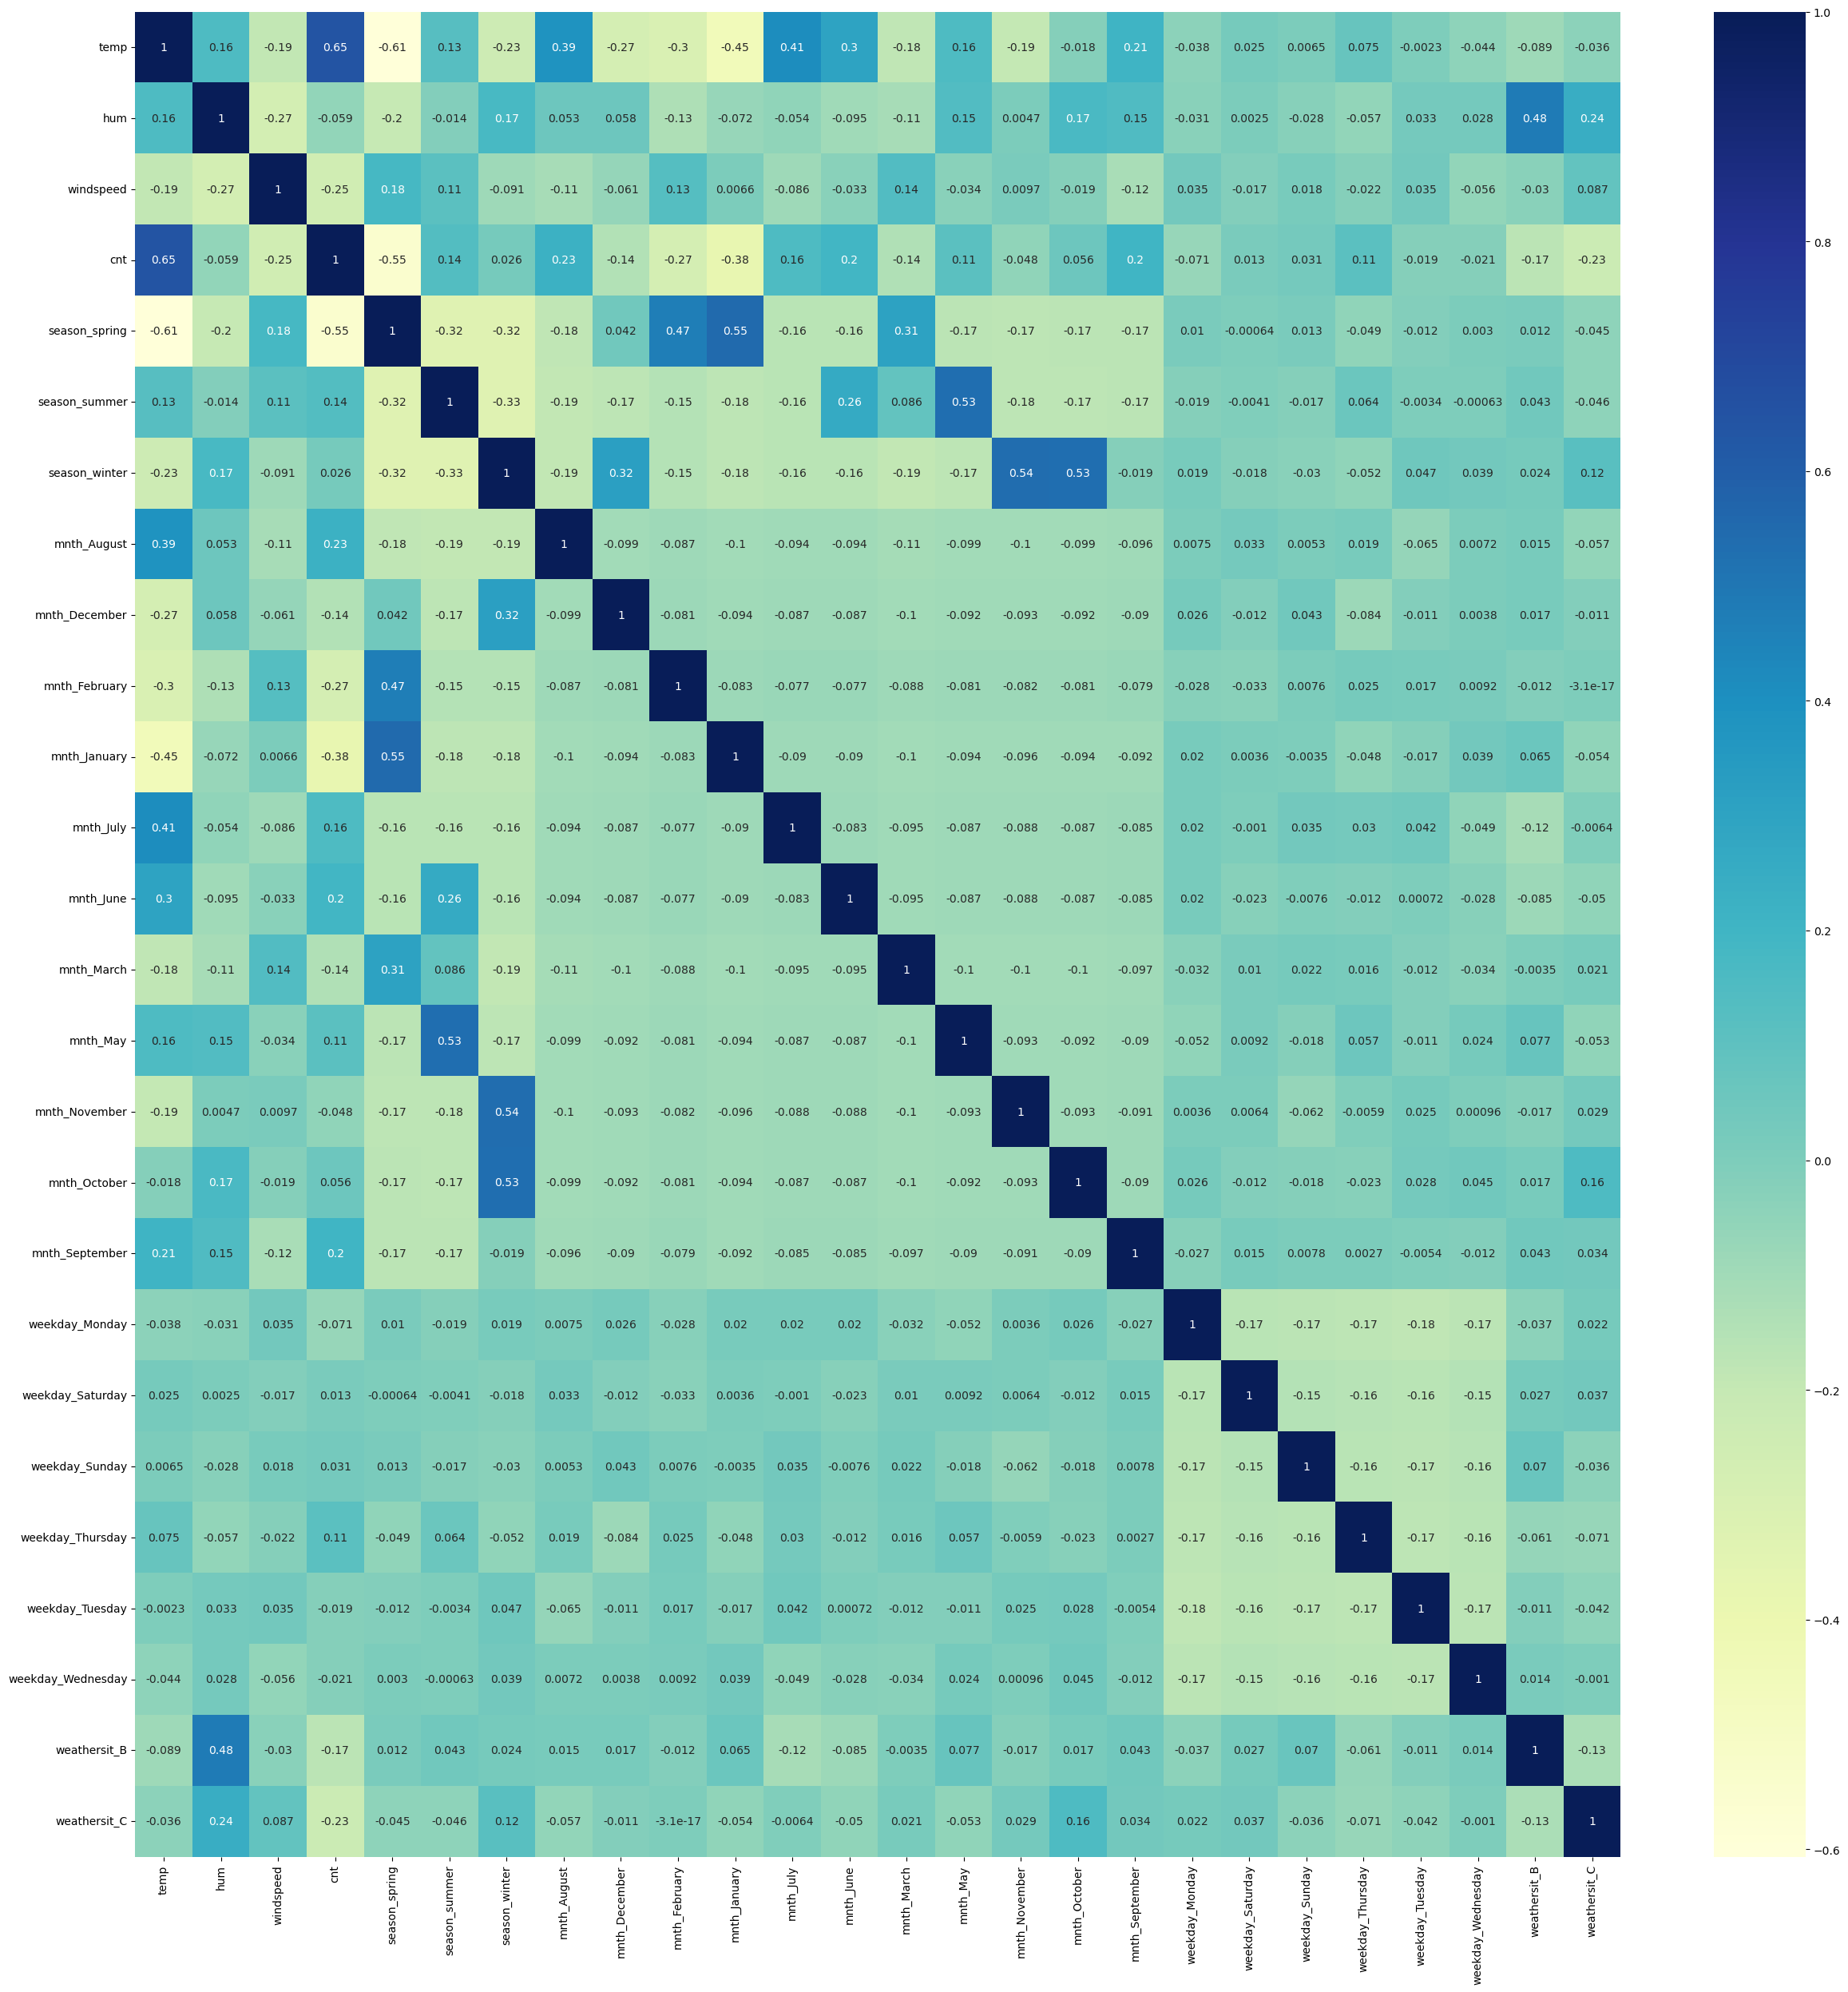

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- we can observe that `temp` seems to the correlated to `cnt` the most. although it is less than 0.7, so we can say that its moderately correlated. 
- No other variables seems to have strong correlation with each other.

Let's see a pairplot for `temp` vs `cnt`.

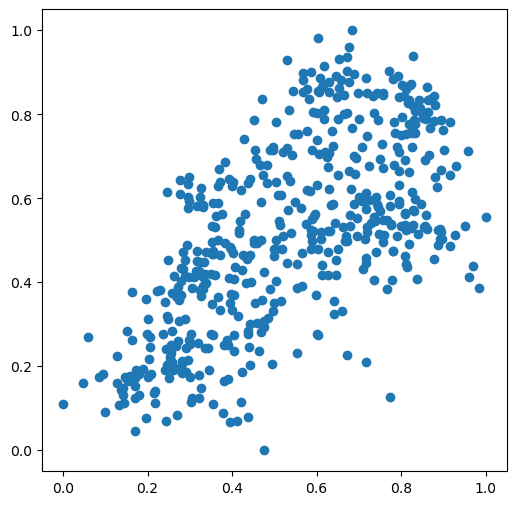

In [42]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

- we can definitly see linear relationship between `temp` and `cnt` variable

#### Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

y_test = df_test.pop('cnt')
X_test = df_test

In [44]:
X_train.shape, X_test.shape

((510, 28), (220, 28))

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   yr                 510 non-null    category
 1   holiday            510 non-null    category
 2   workingday         510 non-null    category
 3   temp               510 non-null    float64 
 4   hum                510 non-null    float64 
 5   windspeed          510 non-null    float64 
 6   season_spring      510 non-null    uint8   
 7   season_summer      510 non-null    uint8   
 8   season_winter      510 non-null    uint8   
 9   mnth_August        510 non-null    uint8   
 10  mnth_December      510 non-null    uint8   
 11  mnth_February      510 non-null    uint8   
 12  mnth_January       510 non-null    uint8   
 13  mnth_July          510 non-null    uint8   
 14  mnth_June          510 non-null    uint8   
 15  mnth_March         510 non-null    uint8   
 16  mnth_M

- as we can see `yr`, `holiday` and `workingday` are still in categorical format because we did not include them during dummy variable creation, let's change them to 'uint8' format

In [46]:
X_train[['yr', 'holiday','workingday']] = X_train[['yr', 'holiday','workingday']].astype('uint8')

X_test[['yr', 'holiday','workingday']] = X_test[['yr', 'holiday','workingday']].astype('uint8')

### Building the first model with all the features

Let's now build our first model with all the features using stats models.

In [47]:
X_train_lm = sm.add_constant(X_train) # adding constant or else statsmodel will fit the line through origin

lr = sm.OLS(y_train, X_train_lm).fit() # fitting the model using ordinary least square method

lr.summary() # getting the model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sun, 18 Feb 2024   Prob (F-statistic):          1.34e-178
Time:                        17:27:40   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3912      0.085      4.594      0.000       0.224       0.558
yr                    0.2311      0.008     28.384      0.000       0.215       0.247
holiday              -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday           -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp                  0.4405      0.047      9.412      0.000       0.349       0.532
hum                  -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed            -0.1825      0.026     -7.003      0.000      -0.234      -0.131
season_spring        -0.0404      0.030     -1.335      0.182      -0.100       0.019
season_summer         0.0464      0.026      1.761      0.079      -0.005       0.098
season_winter         0.1126      0.028      3.994      0.000       0.057       0.168
mnth_August           0.0273      0.034      0.806      0.421      -0.039       0.094
mnth_December        -0.0444      0.034     -1.309      0.191      -0.111       0.022
mnth_February        -0.0374      0.033     -1.123      0.262      -0.103       0.028
mnth_January         -0.0642      0.034     -1.894      0.059      -0.131       0.002
mnth_July            -0.0285      0.035     -0.808      0.420      -0.098       0.041
mnth_June             0.0084      0.025      0.336      0.737      -0.041       0.058
mnth_March            0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May              0.0247      0.021      1.164      0.245      -0.017       0.066
mnth_November        -0.0396      0.037     -1.077      0.282      -0.112       0.033
mnth_October          0.0056      0.036      0.156      0.876      -0.066       0.077
mnth_September        0.0908      0.032      2.822      0.005       0.028       0.154
weekday_Monday       -0.0246      0.015     -1.687      0.092      -0.053       0.004
weekday_Saturday     -0.0557      0.072     -0.777      0.437      -0.197       0.085
weekday_Sunday       -0.0495      0.072     -0.691      0.490      -0.190       0.091
weekday_Thursday      0.0042      0.015      0.282      0.778      -0.025       0.034
weekday_Tuesday      -0.0261      0.015     -1.774      0.077      -0.055       0.003
weekday_Wednesday    -0.0102      0.015     -0.669      0.504      -0.040       0.020
weathersit_B         -0.0578      0.011     -5.495      0.000      -0.079      -0.037
weathersit_C         -0.2499      0.027     -9.380      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:      

- This model has an Adjusted R-squared value of **84.1%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

#### Model Building Using RFE

- Now, we have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. 
- We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [48]:
# Import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [49]:
# Print the rfe results

def print_rfe(rfe):
    rfe_df = pd.DataFrame()
    rfe_df['features'] = X_train.columns
    rfe_df['support'] = rfe.support_
    rfe_df['rank'] = rfe.ranking_
    rfe_df.sort_values('rank',inplace=True)
    rfe_df.reset_index(drop=True,inplace=True)
    return(rfe_df)

print_rfe(rfe1)

,features,support,rank
0,yr,True,1
1,mnth_September,True,1
2,mnth_November,True,1
3,weathersit_B,True,1
4,mnth_January,True,1
5,mnth_December,True,1
6,season_winter,True,1
7,mnth_July,True,1
8,season_spring,True,1
9,holiday,True,1


- rfe has shortlisted top 15 variables with rank as 1

#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [50]:
# Subset the features selected by rfe1
cols = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train = X_train[cols]

# Add a constant to the model
X_train_sm = sm.add_constant(X_train)

In [51]:
# Fitting the model with 15 variables

lm1 = sm.OLS(y_train, X_train_sm).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):          8.15e-189
Time:                        17:27:40   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.1%** to **84.0%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [52]:
# Check for the VIF values of the feature variables. 

In [53]:
# Let's create a dataframe that will contain the names of all the feature variables and their respective VIFs 

def print_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif.sort_values(by = "VIF", ascending = False,inplace=True)
    vif.reset_index(drop=True,inplace=True)
    return vif

print_VIF(X_train)

,Features,VIF
0,hum,30.89
1,temp,17.79
2,windspeed,4.72
3,season_spring,4.37
4,season_winter,4.06
5,season_summer,2.82
6,weathersit_B,2.32
7,yr,2.09
8,mnth_November,1.85
9,mnth_January,1.75


In [54]:
# RFE with 10 features

lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=10)

# Fit with 10 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [55]:
print_rfe(rfe2)

,features,support,rank
0,yr,True,1
1,holiday,True,1
2,temp,True,1
3,hum,True,1
4,windspeed,True,1
5,season_summer,True,1
6,season_winter,True,1
7,mnth_July,True,1
8,mnth_September,True,1
9,weathersit_C,True,1


In [56]:
cols = X_train.columns[rfe2.support_]
X_train_sm = sm.add_constant(X_train[cols])

In [57]:
# Building model using new features

lm2 = sm.OLS(y_train, X_train_sm).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 18 Feb 2024   Prob (F-statistic):          2.79e-186
Time:                        17:27:40   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2682      0.026     10.

Note that the new model 2 built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone down from **84.0%** to **82.9%**, with removal of 5 features. This is indeed a good indication to proceed with these selected features.

In [58]:
# Now let's check the VIF for these selected features and decide further.

print_VIF(X_train[cols])

,Features,VIF
0,hum,10.29
1,temp,9.29
2,windspeed,3.54
3,yr,2.02
4,season_summer,1.76
5,season_winter,1.68
6,mnth_July,1.55
7,mnth_September,1.29
8,weathersit_C,1.09
9,holiday,1.04


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables.

So let's try removing `hum` first having the maximum VIF and then check for it again. 
Dropping this variable may result in a change in other VIFs which are high.

In [59]:
cols = cols.drop('hum')

In [60]:
X_train_sm = sm.add_constant(X_train[cols])

# Now that we have removed one variable, let's fit the model with 9 variables

lm3 = sm.OLS(y_train, X_train_sm).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Sun, 18 Feb 2024   Prob (F-statistic):          4.42e-171
Time:                        17:27:40   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0840      0.018      4.

- The model seems to be doing a good job. but `mnth_July` variable has become insignificant.
- Let's also quickly take a look at the VIF values.

In [61]:
print_VIF(X_train[cols])

,Features,VIF
0,temp,4.96
1,windspeed,3.01
2,yr,2.00
3,season_summer,1.75
4,mnth_July,1.51
5,season_winter,1.43
6,mnth_September,1.28
7,weathersit_C,1.06
8,holiday,1.03


- All vif values are good, now lets drop 'mnth_July' and build a new model

In [62]:
cols = cols.drop('mnth_July')

In [63]:
X_train_sm = sm.add_constant(X_train[cols])

lm4 = sm.OLS(y_train, X_train_sm).fit()   
print(lm4.summary())

print_VIF(X_train[cols])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sun, 18 Feb 2024   Prob (F-statistic):          9.22e-172
Time:                        17:27:40   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0875      0.017      5.

,Features,VIF
0,temp,3.63
1,windspeed,2.97
2,yr,2.00
3,season_summer,1.55
4,season_winter,1.34
5,mnth_September,1.20
6,weathersit_C,1.06
7,holiday,1.03


- This model seems to perform good as all the variables have p-value under 0.05 and vif under 5, 
- with 8 variables explaining almost 80% of variance in the data as compared to initial 28 variables explaining 84% variance.
- This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [64]:
y_train_pred = lm4.predict(X_train_sm)

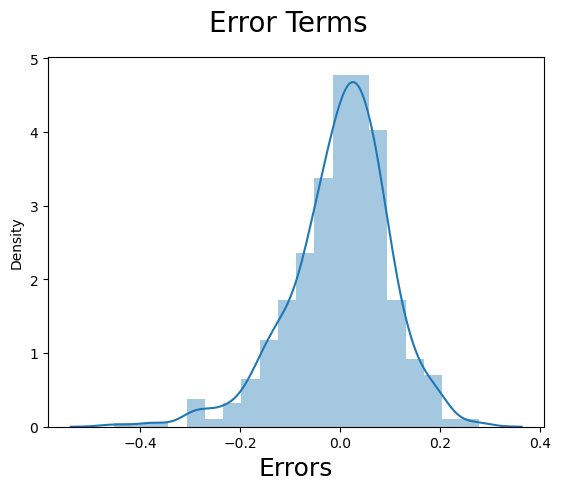

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)       

plt.show()

The error terms are fairly normally distributed. Let's now make predictions on the test-set.

### Making Predictions on Test Set

In [66]:
# only selecting columns which were used fror final model building 

X_test = X_test[cols]

In [67]:
X_test_sm = sm.add_constant(X_test)

In [68]:
# Making predictions

y_test_pred = lm4.predict(X_test_sm)

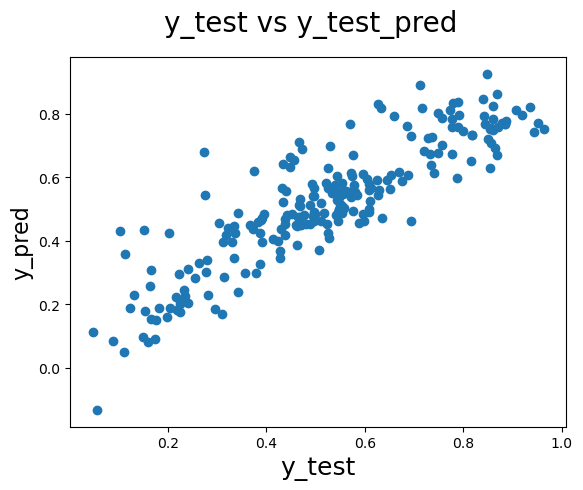

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [70]:
# r2_score for 8 variables
from sklearn.metrics import r2_score

print("r2 score train set: ",r2_score(y_train, y_train_pred))
print("r2 score test set: ",r2_score(y_test, y_test_pred))

r2 score train set:  0.8038032148021996
r2 score test set:  0.7720731949554798


Thus, for the model with 8 variables, the r-squared on training and test data is about 80.38% and 77.20% respectively. The adjusted r-squared on the train set is about is about 80.1%.

#### Checking the correlations between the final predictor variables

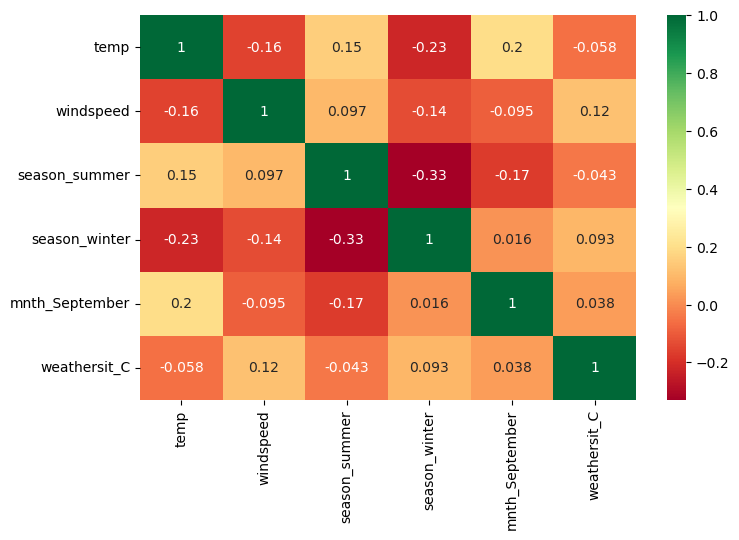

In [71]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df_day[cols].corr(), cmap="RdYlGn", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations. 

Thus, the final model consists of the 8 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.